<H1> Proyecto Final </H1>
Se ejecuta en Python 3.8.8 y conda.

Presentado por: 
- Jose Alejandro García Marcos
- Sebastián Becerra Zapata
- Juan David Ballesteros Valencia

<h2> Visualización de datos </h2>

Se inicia realizando las importaciones de las librerías necesarias

In [93]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import math
import matplotlib as mpl
import matplotlib.pyplot as plt #gráficos
import seaborn as sns
from sklearn import datasets
from sklearn import neighbors, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV #permite buscar la mejor configuración de parámetros con C-V
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
from sklearn.metrics import make_scorer # permite crear una clase scorer a partir de una función de score (necesario para el kappa)
import statistics

## Filtar warmings que no son relevantes
import warnings
warnings.filterwarnings('ignore')

Se importa el dataset

In [94]:
data = pd.read_csv('PF-DatosTelco.csv', sep=',')
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


Se muestra el información acerca de los datos

In [95]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESTADO              23162 non-null  object 
 1   INGRESOS            23162 non-null  int64  
 2   CASA                23162 non-null  float64
 3   PRECIO_DISPOSITIVO  23162 non-null  float64
 4   MESES               23162 non-null  int64  
 5   DURACION            23162 non-null  float64
 6   SOBRECARGO          23162 non-null  float64
 7   SALDO_RESTANTE      23162 non-null  float64
 8   SATISFACCION        23162 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [96]:
data.describe(include="all")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23162,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RETIRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.813115e+06,7.161435e+08,1.315340e+06,24.197133,9.609852,110.056296,42.991888,5.480840
std,NaN,2.737374e+06,4.811551e+08,7.485700e+05,14.264014,7.040007,100.771503,30.204540,2.809938
min,NaN,1.500000e+05,8.000000e+07,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.613580
25%,NaN,2.156296e+06,3.570000e+08,6.571840e+05,14.000000,2.100000,12.566883,15.200000,2.705504
50%,NaN,6.137553e+06,6.240000e+08,1.237456e+06,24.000000,14.600000,75.383640,37.650000,4.064550
75%,NaN,7.347180e+06,9.077500e+08,1.829581e+06,34.000000,16.100000,201.550049,70.000000,8.268244


Aquí revisamos que no hayan datos faltantes

In [97]:
print(pd.isnull(data).any(0))

ESTADO                False
INGRESOS              False
CASA                  False
PRECIO_DISPOSITIVO    False
MESES                 False
DURACION              False
SOBRECARGO            False
SALDO_RESTANTE        False
SATISFACCION          False
dtype: bool


Se factorizan los datos de la columna Estado, 0 y 1 corresponden a vinculado y retirado respectivamente.

In [98]:
Estado_Names = data.ESTADO.factorize()[1]
Estado_Names

Index(['VINCULADO', 'RETIRADO'], dtype='object')

In [99]:
data['ESTADO_2'] = data.ESTADO.factorize()[0]
data.head(5)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION,ESTADO_2
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872,0
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266,0
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438,1
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017,1
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206,1


Se cuentan el número de clientes vinculados y ya retirados

49.63733701752871

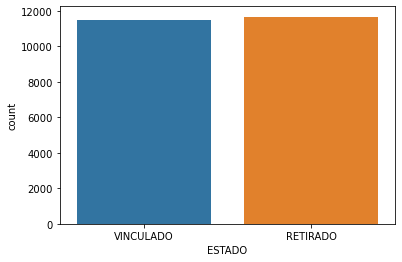

In [100]:
ax = sns.countplot(x="ESTADO", data=data)
data.ESTADO[data.ESTADO=="VINCULADO"].aggregate('count') / data.shape[0] * 100

In [101]:
labels =  data.columns[1:]
labels

Index(['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION', 'ESTADO_2'],
      dtype='object')

Se saca del dataset la columna ESTADO

In [102]:
d = pd.DataFrame(data)
d.drop('ESTADO', axis=1, inplace=True)

d.columns=labels
d.head(5)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION,ESTADO_2
0,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872,0
1,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266,0
2,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438,1
3,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017,1
4,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206,1


In [103]:
categorias = dict(zip(["0", "1"],Estado_Names))
categorias

{'0': 'VINCULADO', '1': 'RETIRADO'}

In [104]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INGRESOS            23162 non-null  int64  
 1   CASA                23162 non-null  float64
 2   PRECIO_DISPOSITIVO  23162 non-null  float64
 3   MESES               23162 non-null  int64  
 4   DURACION            23162 non-null  float64
 5   SOBRECARGO          23162 non-null  float64
 6   SALDO_RESTANTE      23162 non-null  float64
 7   SATISFACCION        23162 non-null  float64
 8   ESTADO_2            23162 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 1.6 MB


Se usa el método describe para calcular algunos datos estadisticos 

In [105]:
d.describe(include="all")

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION,ESTADO_2
count,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
mean,4.813115e+06,7.161435e+08,1.315340e+06,24.197133,9.609852,110.056296,42.991888,5.480840,0.503627
std,2.737374e+06,4.811551e+08,7.485700e+05,14.264014,7.040007,100.771503,30.204540,2.809938,0.499998
min,1.500000e+05,8.000000e+07,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.613580,0.000000
25%,2.156296e+06,3.570000e+08,6.571840e+05,14.000000,2.100000,12.566883,15.200000,2.705504,0.000000
50%,6.137553e+06,6.240000e+08,1.237456e+06,24.000000,14.600000,75.383640,37.650000,4.064550,1.000000
75%,7.347180e+06,9.077500e+08,1.829581e+06,34.000000,16.100000,201.550049,70.000000,8.268244,1.000000
max,9.650000e+06,2.180000e+09,4.700000e+06,79.000000,20.100000,411.168400,130.700000,9.642618,1.000000


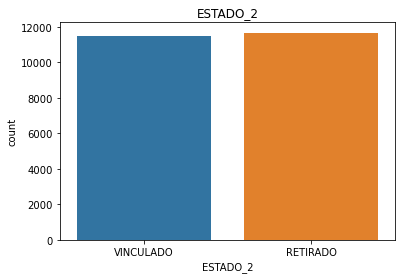

In [106]:
fig, ax = plt.subplots()
sns.countplot(x=d.columns[8], data=d)
plt.title(d.columns[8])
ax.set_xticklabels(Estado_Names)

plt.show()

Se visualizan los datos en diagramas de violin

Ahora separamos los datos por estado para los diagramas

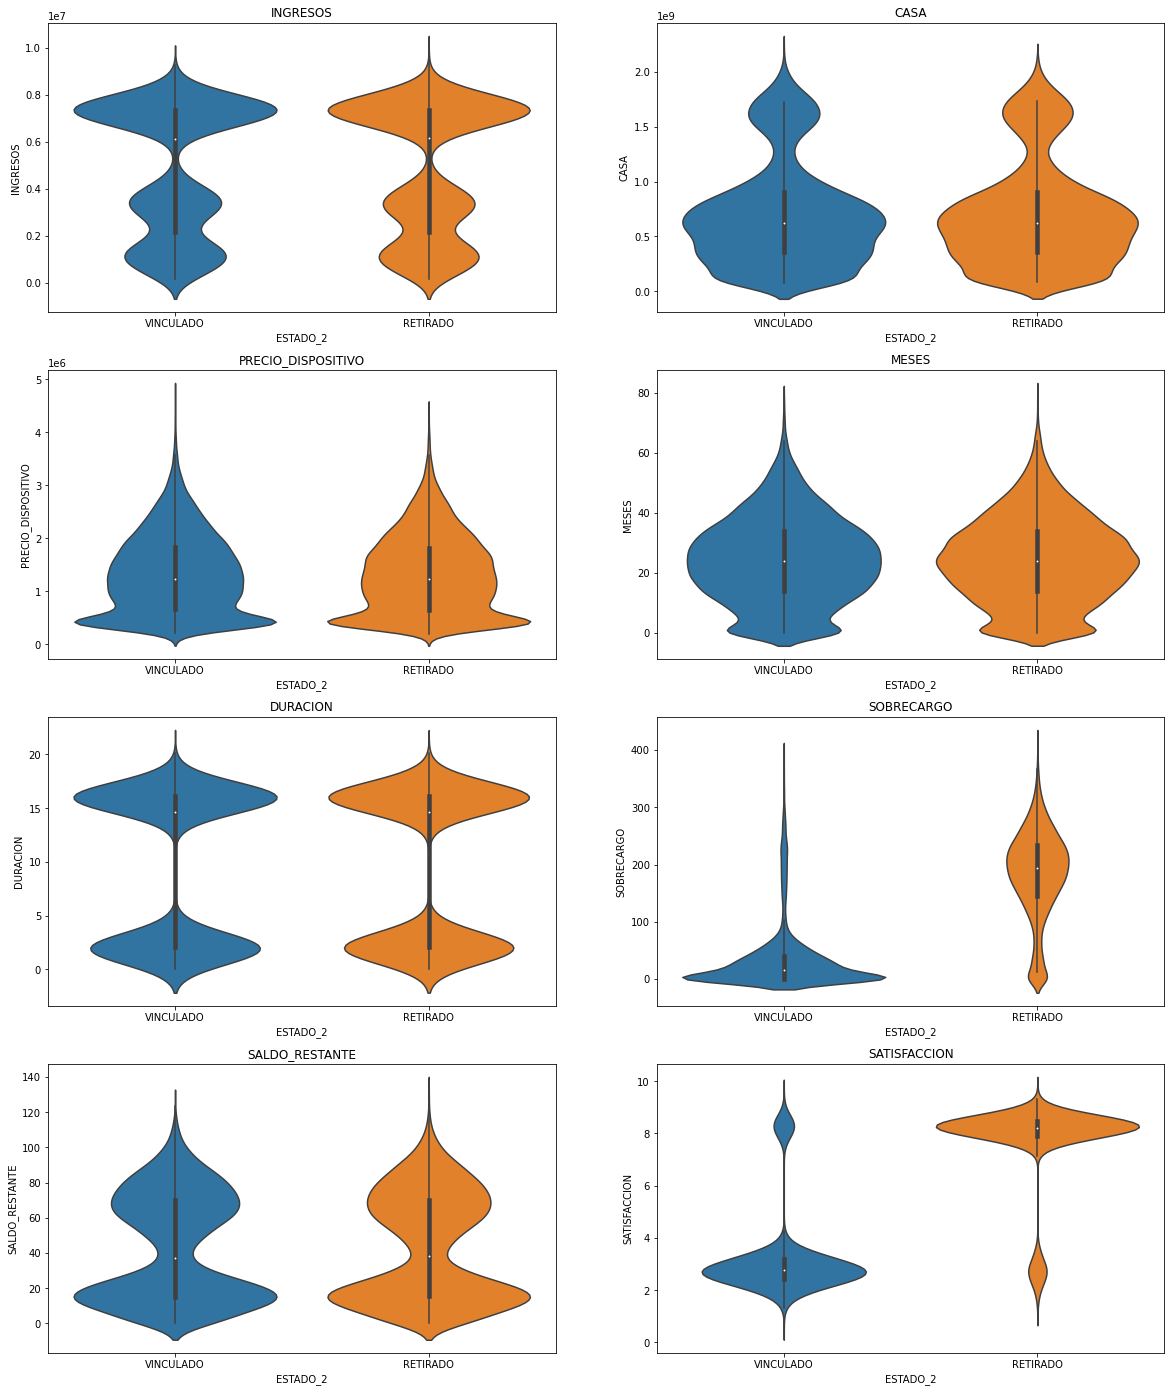

In [107]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in d.columns[0:8]:
    ax = fig.add_subplot(8, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.violinplot(x=d.columns[8], y=var_num, data=d)
    plt.title(var_num)
    ax.set_xticklabels(Estado_Names)
    i+=1

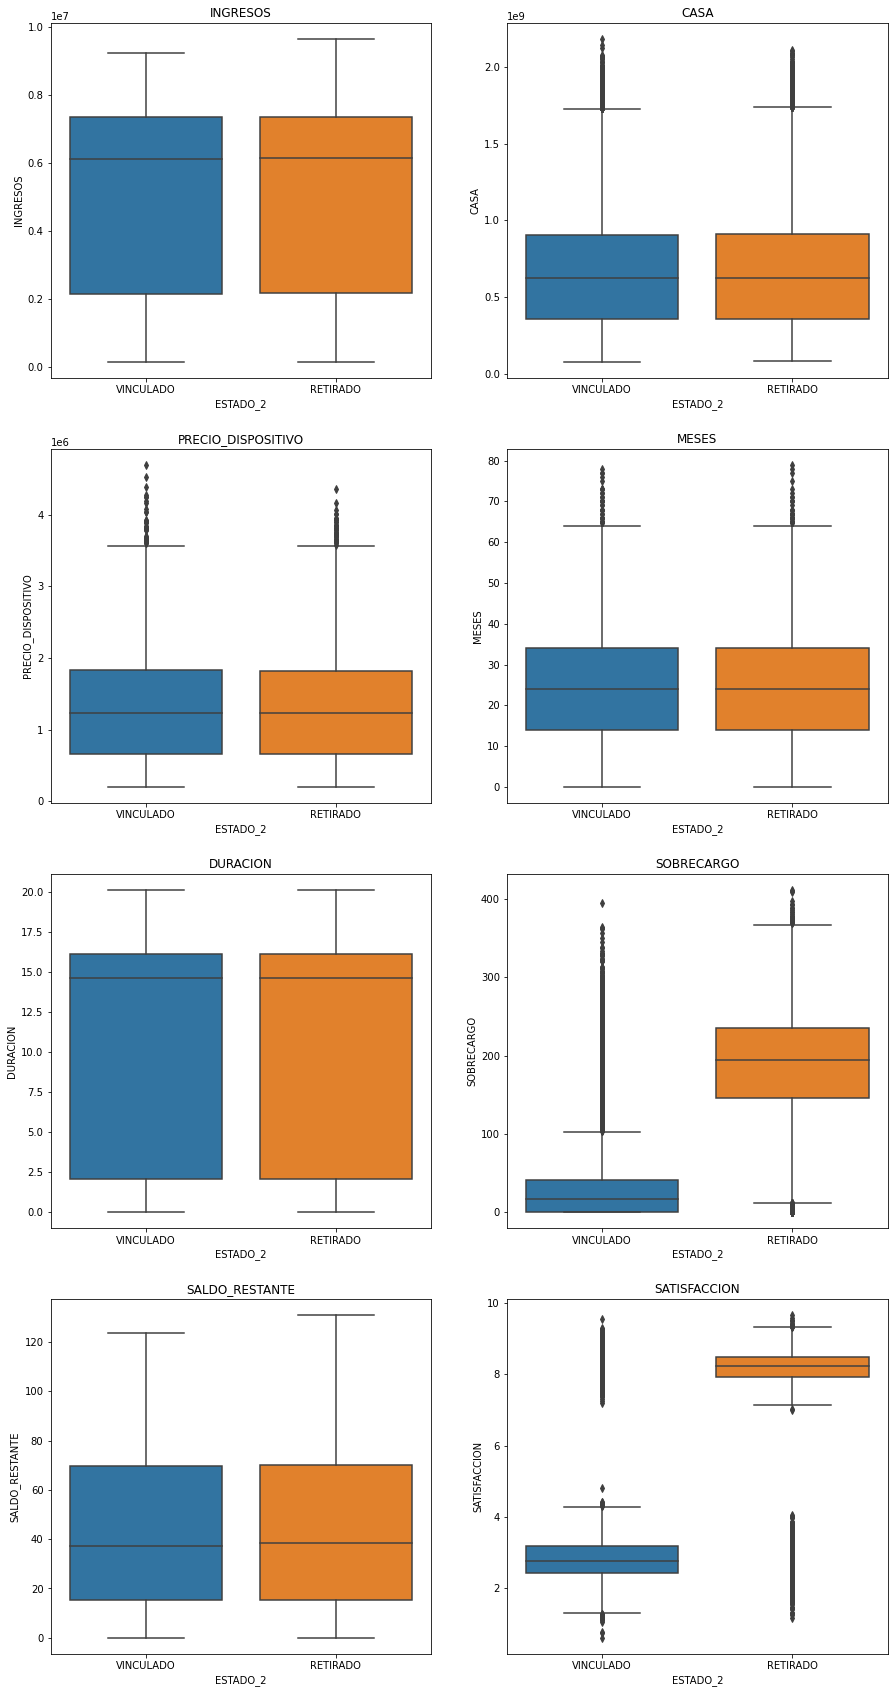

In [108]:
fig = plt.figure(figsize=(15,30))
i=1

for var_num in d.columns[0:8]:
    ax = fig.add_subplot(4, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.boxplot(x=d.columns[8], y=var_num, data=d)
    plt.title(var_num)
    ax.set_xticklabels(Estado_Names)
    i+=1

In [109]:
Vinculado = d.loc[d.ESTADO_2 == 0]
Retirado = d.loc[d.ESTADO_2 == 1]

Vinculado.head(5)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION,ESTADO_2
0,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872,0
1,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266,0
5,7250225,4.240000e+08,548116.0,19,2.2,0.000000,72.0,1.979549,0
8,7281977,1.770000e+09,2453442.0,41,3.0,0.000000,64.6,2.654332,0
14,1063556,7.140000e+08,1991877.0,12,15.7,0.000000,0.0,2.654777,0


In [110]:
Retirado.head(5)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION,ESTADO_2
2,795993,95000000.0,452809.0,38,16.8,350.610224,13.9,8.359438,1
3,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017,1
4,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206,1
6,7256758,712000000.0,3493707.0,20,14.8,217.322554,69.5,8.285137,1
7,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629,1


Relación entre las variables ingresos, casa, precio del dispositvo y meses de antiguedad con la compañia, con la variable objetivo si está vinculado o retirado

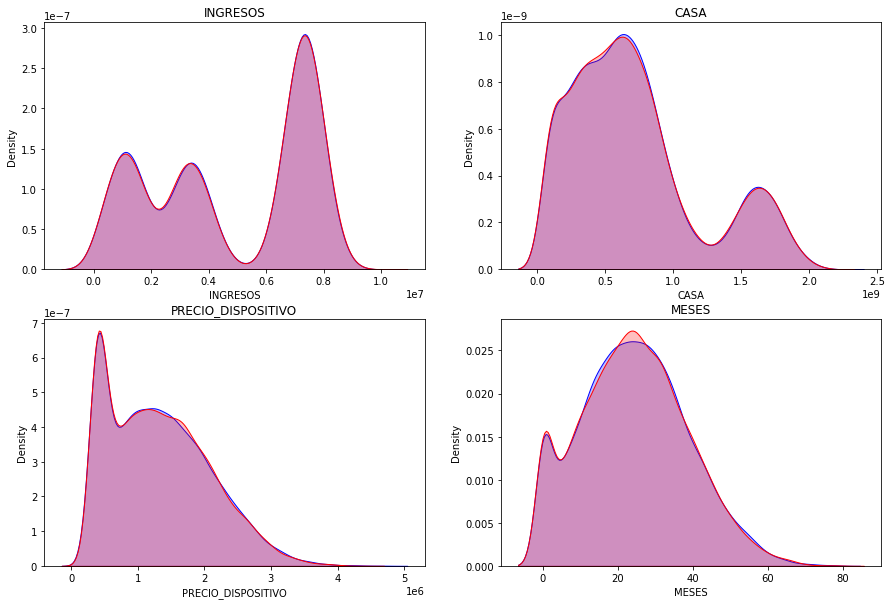

In [111]:
x=0
y=0
fig, axs = plt.subplots(figsize=[15, 10], ncols=2, nrows=2)
for var_num in d.columns[0:4]:
    sns.kdeplot(Vinculado[[var_num]].iloc[:,0], shade=True, color="b", ax=axs[y,x], label="Vinculado")
    sns.kdeplot(Retirado[[var_num]].iloc[:,0], shade=True, color="r", ax=axs[y,x], label="Retirado")
    axs[y,x].set_title(var_num)
    if x==0:
        x=1
    else:
        y=1
        x=0

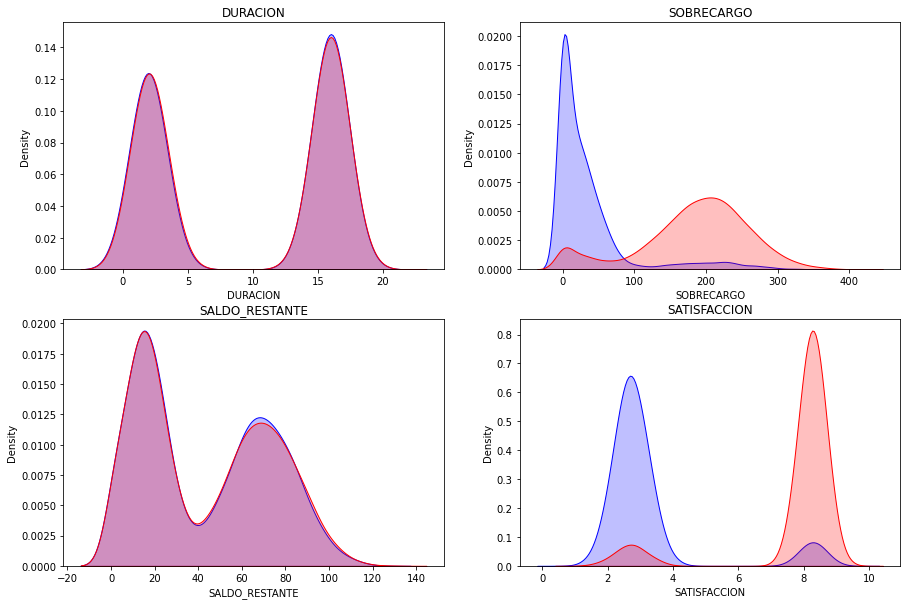

In [112]:
x=0
y=0
fig, axs = plt.subplots(figsize=[15, 10], ncols=2, nrows=2)
for var_num in d.columns[4:8]:
    sns.kdeplot(Vinculado[[var_num]].iloc[:,0], shade=True, color="b", ax=axs[y,x], label="Vinculado")
    sns.kdeplot(Retirado[[var_num]].iloc[:,0], shade=True, color="r", ax=axs[y,x], label="Retirado")
    axs[y,x].set_title(var_num)
    if x==0:
        x=1
    else:
        y=1
        x=0

Se usa la herramienta kdeplot para visualizar la densidad de probabilidad de las variables. 

Text(0.5, 1.0, 'SOBRECARGO vs. SATISFACCION')

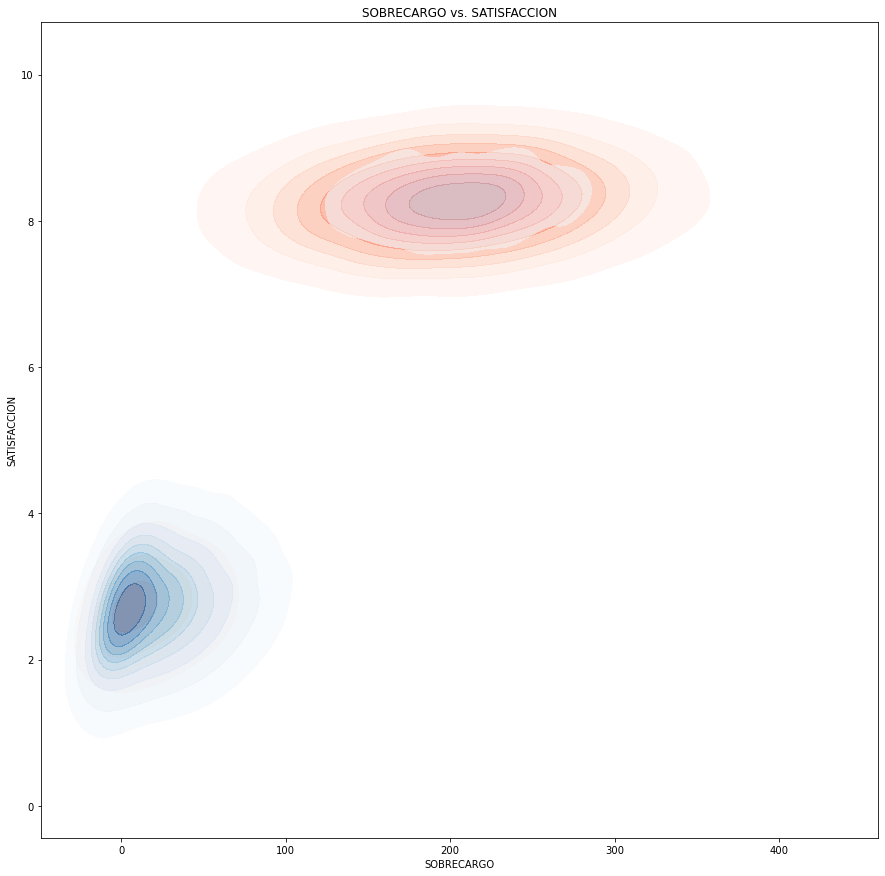

In [113]:
fig, axs = plt.subplots(figsize=[15, 15], ncols=1, nrows=1)

ax = sns.kdeplot(Retirado.SOBRECARGO, Retirado.SATISFACCION, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="Retirado", ax=axs)
ax = sns.kdeplot(Vinculado.SOBRECARGO, Vinculado.SATISFACCION, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="Vinculado", ax=axs)
ax.set_title("SOBRECARGO vs. SATISFACCION")

Se utiliza Pairplot para visualizar los datos y así encontrar la relación entre las variables

<Figure size 1440x1440 with 0 Axes>

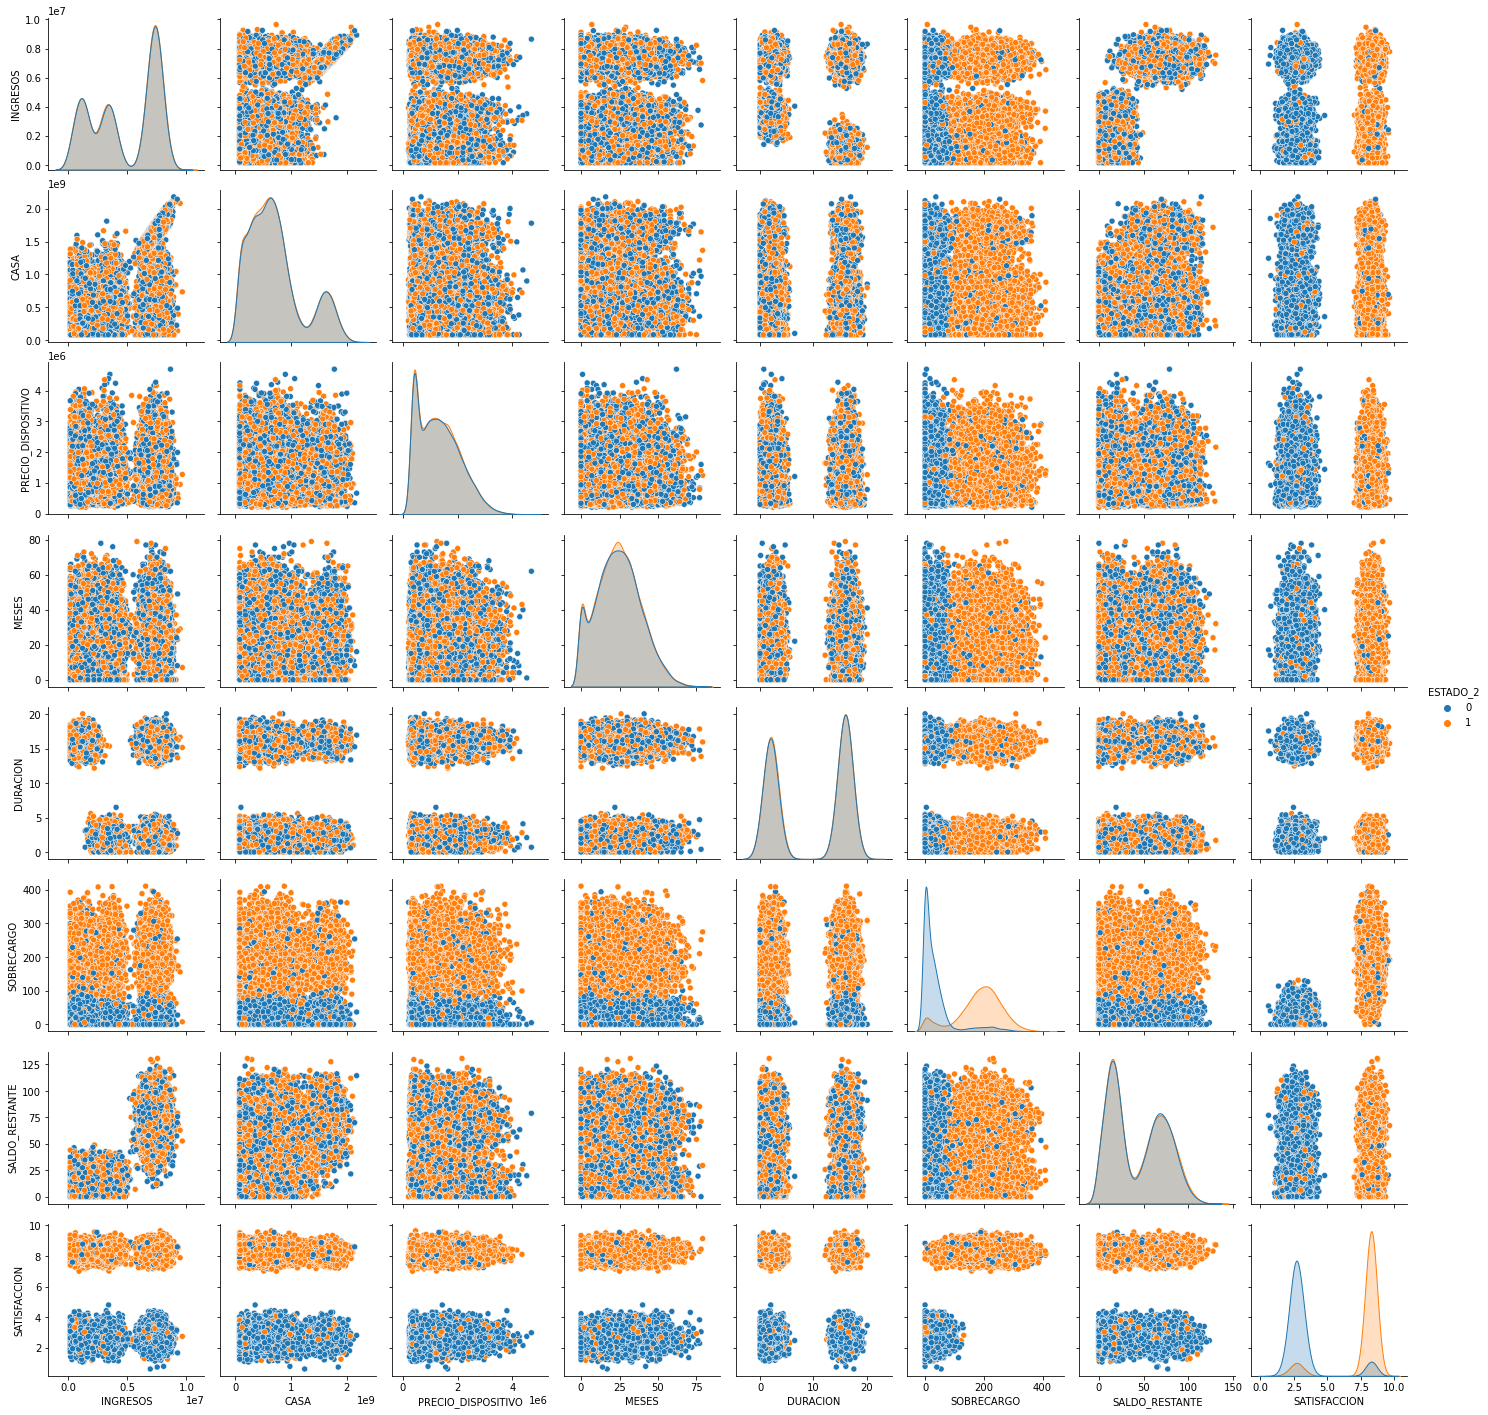

In [114]:
plt.figure(figsize=(20,20))
ax = sns.pairplot(d, hue="ESTADO_2")

# Extracción de intuiciones de los datos

* Del gráfico de barras se puede notar que los datos están divididos equitativamente entre estados: Casi mitades iguales son retirados y vinculados.
* Se comprobó que no hay variables con datos faltantes.
* De los diagramas de violín se puede intuir que ninguna variable tiene distribución normal.
* De los diagramas de violín separados por estado se puede intuir que la distribución de los datos entre Retirados y Vinculados es diferente para las variables de Sobrecargo y Satisfacción, para las demás variables son muy homogéneas las distribuciones.
* De los diagramas caja y bigotes se puede intuir que las variables comparten sus cuartiles y medias a excepción nuevamente de Sobrecargo y Satisfacción. También nos damos cuenta que se presentan datos atípicos en las variables excepto en Ingresos, duración y Saldo Restante.
* De los gráficos de densidades nos damos cuenta que en la variable de Meses, al rededor de los 25 meses, los Retirados son ligeramente más que los Vinculados. En la variable Saldo Restante, hay ligeramente más Vinculados que Retirados. En la variable de Sobrecargo Los retirados presentan generalmente un mayor sobrecargo y en la variable Satisfacción los Retirados presentan una Satisfacción mayor (sin embargo, a través de un análisis lógico, nos damos cuenta que tener un valor más alto en Satisfacción indica mayor disgusto pues son los retirados los que tienen un valor más alto de Satisfacción).
* Al analizar las distribuciones bivariadas de Satisfacción VS Sobrecargo nos damos cuenta que se generan grupos diferenciados, donde los Vinculados presentan menor Satisfacción y menor Sobrecargo, mientras que los Retirados presentan alta Satisfacción y alto Sobrecargo.
* Del pair plot recalcamos que Sobrecargo y Satisfacción son las variables que mejor dividen los datos, pues en ambos ejes generan grupos separados para los Retirados y los Vinculados.

Concluímos que para las siguientes etapas del proyecto, se deberá utilizar Satisfacción y Sobrecargo como variables claves y revisar cómo tratar los datos atípicos en estas variables.

# Continuamos con la limpieza de los datos

Revisamos la distribución de las dos variables más interesantes de acuerdo a lo hallado en la exploración de datos (Sobrecargo, Satisfacción)

In [115]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INGRESOS            23162 non-null  int64  
 1   CASA                23162 non-null  float64
 2   PRECIO_DISPOSITIVO  23162 non-null  float64
 3   MESES               23162 non-null  int64  
 4   DURACION            23162 non-null  float64
 5   SOBRECARGO          23162 non-null  float64
 6   SALDO_RESTANTE      23162 non-null  float64
 7   SATISFACCION        23162 non-null  float64
 8   ESTADO_2            23162 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 1.6 MB


count    23162.000000
mean       110.056296
std        100.771503
min          0.000000
25%         12.566883
50%         75.383640
75%        201.550049
max        411.168400
Name: SOBRECARGO, dtype: float64


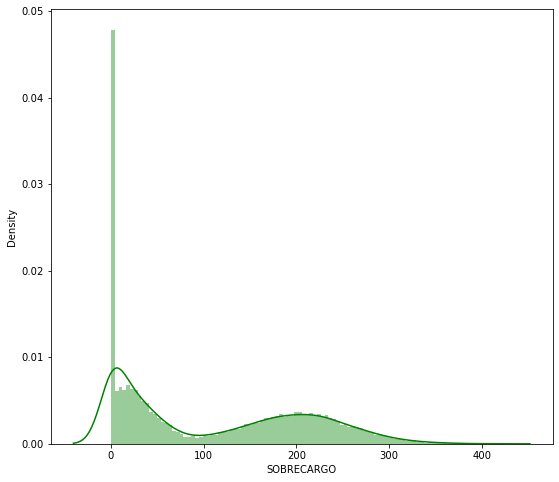

In [116]:
print(d['SOBRECARGO'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(d['SOBRECARGO'], color='g', bins=100, hist_kws={'alpha': 0.4});

stá seCon esta información podemos observar que la distribución de Sobrecargo tiene un comportamiento bimodal


count    23162.000000
mean         5.480840
std          2.809938
min          0.613580
25%          2.705504
50%          4.064550
75%          8.268244
max          9.642618
Name: SATISFACCION, dtype: float64


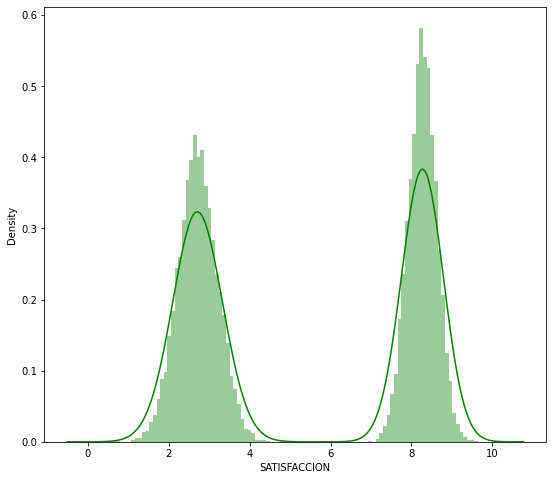

In [117]:
print(d['SATISFACCION'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(d['SATISFACCION'], color='g', bins=100, hist_kws={'alpha': 0.4});

Con esta información podemos observar que la distribución de SATISFACCION tiene un comportamiento bimodal

Se realizará un analisis de todas las variables

In [118]:
list(set(d.dtypes.tolist()))
df_num = d.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION,ESTADO_2
0,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872,0
1,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266,0
2,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438,1
3,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017,1
4,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206,1


Variables independientes que se encuentran fuertemente correlacionadas con la variable objetivo ESTADO_2 y las guardaremos en una variable que llamaremos golden_feature_list

In [119]:
df_num_corr = df_num.corr()['ESTADO_2'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with ESTADO_2:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 strongly correlated values with ESTADO_2:
SATISFACCION    0.801472
SOBRECARGO      0.731439
Name: ESTADO_2, dtype: float64


Ahora tenemos una lista de variables que se correlacionan fuertemente con la variable objetivo. Desafortunadamente esta lista está incompleta ya que la correlación se ve afectada por los datos atípicos.

Por tal razón, procedemos a:

- Graficar las variables numéricas y verificar cuáles tienen pocos datos atípicos o datos atípicos explicables.
- Eliminar los datos atípicos de dichas predictoras y ver si tienen una buena correlación sin los datos atípicos.

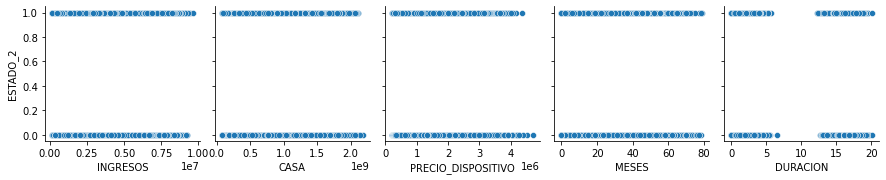

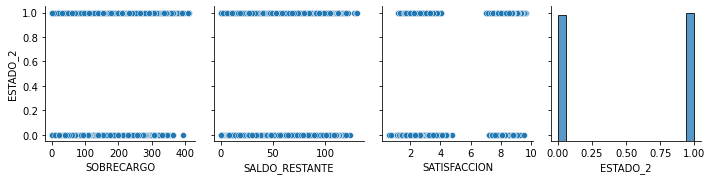

In [120]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['ESTADO_2'])

In [121]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is ESTADO_2
    tmpDf = df_num[[df_num.columns[i], 'ESTADO_2']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['ESTADO_2'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))
    

PRECIO_DISPOSITIVO: -0.002906916391152266
          MESES: -0.0015761608400596669
           CASA: -0.0010656972197192378
       DURACION: -0.0007570200056015392
       INGRESOS: 0.0015838306176918745
 SALDO_RESTANTE: 0.003714926574422524
     SOBRECARGO: 0.7061138046690373
   SATISFACCION: 0.8014718832622268


In [122]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There are {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 strongly correlated values with SalePrice:
['SOBRECARGO', 'SATISFACCION']


In [123]:
df_num.shape ## Seguimos obteniendo la misma cantidad de datos, de esta forma encontramos que no existen datos atipicos no relacionados

(23162, 9)

## Análisis 

Al revisar el dataset en busqueda de datos atípicos para ser eliminados, no se encontraron datos atípicos relevantes relacionados con el estado del cliente. Es importante recalcar que en algunos diagramas de cajas se observan puntos de datos lejanos, pero es necesario recordar que estos gráficos representan el conjunto de datos por separado y al unir las dos cajas no quedan datos atipicos. 

También se encontró que las variables relevantes para el entrenamiento son sobrecargo y satisfacción, donde satisfacción tiene el mayor peso de correlación.

# Modelamiento

Ahora vamos a crear 3 modelos de predicción para los cuales usaremos el k-fold cross validation (evaluando accuracy) como protocolo de evaluación para los 3 modelos.

<h1> Regresión logistica </h1>

In [124]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import exp

Implementamos una función que pueda hacer predicciones a partir de la función sigmoide. Esta función predice un valor de salida para un registro y un conjunto de coeficientes. El coeficiente inicial siempre es el intercepto que se denomina también el sesgo (no es responsable de un valor específico de entrada)

In [125]:
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

Definimos los valores de los coeficientes

In [126]:
coef = [-0.406605464, 0.852573316, -1.104746259]

In [127]:
res = df_num['ESTADO_2']
dataset = df_num[['SOBRECARGO', 'SATISFACCION']]

dataset.head()


,SOBRECARGO,SATISFACCION
0,11.167542,1.762872
1,0.000000,3.361266
2,350.610224,8.359438
3,230.913888,8.964017
4,131.541983,8.808206


In [128]:
#------------------------------------
logReg = LogisticRegression(random_state=0)
exactitudes = cross_val_score(logReg, dataset, res, cv=10, scoring='accuracy')
print('Average accuracy :',statistics.mean(exactitudes))
#------------------------------------

Average accuracy : 0.9058373827749092


In [129]:
logReg = LogisticRegression(random_state=0)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
scores = cross_validate(logReg, dataset, res, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f" % (key, score.mean()))

fit_time: 0.09
score_time: 0.01
test_accuracy: 0.91
test_precision_weighted: 0.91
test_recall_weighted: 0.91
test_f1_weighted: 0.91


# Red neuronal

Ahora vamos a modelar con una red neuronal. Como tenemos tantos datos, no encontraremos la mejor combinación y usamos hidden_layer_sizes=(30,30,30) y valores predeterminados para los demás parámetros.

In [130]:
#------------------------------
np.random.seed(1234)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=1)
print("Average accuracy: ", statistics.mean(cross_val_score(mlp, dataset, res, cv=10, scoring='accuracy')))
#------------------------------

Average accuracy:  0.9055783340526543


In [131]:
scores = cross_validate(mlp, dataset, res, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f" % (key, score.mean()))

fit_time: 5.73
score_time: 0.01
test_accuracy: 0.91
test_precision_weighted: 0.91
test_recall_weighted: 0.91
test_f1_weighted: 0.91


<h1> KNN </h1>

Clasificación a partir de K-NN. Encontraremos el mejor número para k entre algunas opciones.

In [132]:
#---------------------------
ks=[1,3,5,7,9,11,15,17,23,27,31]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    print("Con K = ", k, ", exactitud: ", statistics.mean(cross_val_score(knn, dataset, res, cv=10, scoring='accuracy')))
#---------------------------

Con K =  1 , exactitud:  0.8258353068071617
Con K =  3 , exactitud:  0.8866248044229667
Con K =  5 , exactitud:  0.9002679377403483
Con K =  7 , exactitud:  0.9033764478663747
Con K =  9 , exactitud:  0.9046716728423911
Con K =  11 , exactitud:  0.9049738621870488
Con K =  15 , exactitud:  0.9050170400799676
Con K =  17 , exactitud:  0.9048011692506316
Con K =  23 , exactitud:  0.9043694275919594
Con K =  27 , exactitud:  0.9039809010967222
Con K =  31 , exactitud:  0.9035923186957109


In [133]:
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
scores = cross_validate(knn, dataset, res, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f" % (key, score.mean()))

fit_time: 0.05
score_time: 0.15
test_accuracy: 0.91
test_precision_weighted: 0.91
test_recall_weighted: 0.91
test_f1_weighted: 0.91


### Métricas y matriz de confusión

Ahora vamos a mostrar algunas métricas y matrices de confusión de los modelos.

<h2>KNN</h2>

In [134]:
X_train, X_test, y_train, y_test = train_test_split(dataset, res, test_size=0.4, random_state=12345, stratify=res)

Matriz de confusión no normalizada
[[4163  436]
 [ 487 4179]]
Matriz de confusión normalizada
[[0.91 0.09]
 [0.1  0.9 ]]


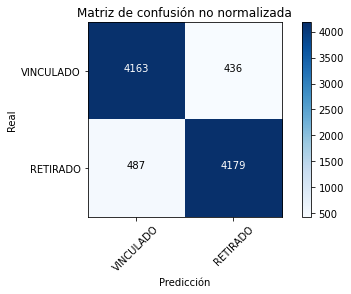

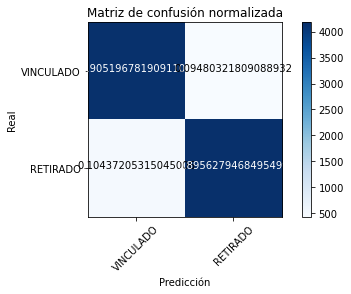

[[4163  436]
 [ 487 4179]]
Exactitud:  0.9003777657852131
Kappa    :  0.8007609744209662
-------------------------------------
Metricas para la categoría  VINCULADO
Precisión     :  0.8952688172043011
Recall        :  0.9051967819091107
Especificidad :  0.9055254604550379
F1-score      :  0.9002054276137961
-------------------------------------
Metricas para la categoría  RETIRADO
Precisión     :  0.9055254604550379
Recall        :  0.8956279468495499
Especificidad :  0.98
F1-score      :  0.9005495097511044
-------------------------------------


In [135]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm= metrics.confusion_matrix(y_test, y_pred)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Estado_Names))
    plt.xticks(tick_marks, Estado_Names, rotation=45)
    plt.yticks(tick_marks, Estado_Names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión no normalizada')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Estado_Names,
                      title='Matriz de confusión no normalizada')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Estado_Names, normalize=True,
                      title='Matriz de confusión normalizada')

plt.show()
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("-------------------------------------")
print("Metricas para la categoría ", Estado_Names[0])
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", Estado_Names[1])
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))
VN = 98
FP = 2
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))
print("-------------------------------------")

<h2>Regresión Logística</h2>

Matriz de confusión no normalizada
[[4163  436]
 [ 478 4188]]
Matriz de confusión normalizada
[[0.91 0.09]
 [0.1  0.9 ]]


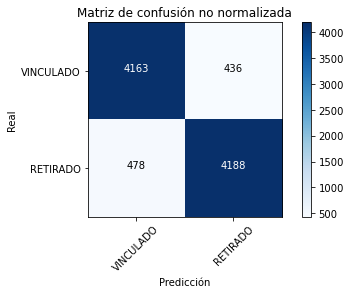

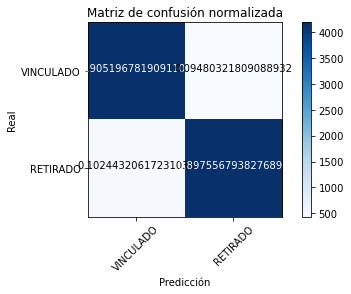

[[4163  436]
 [ 478 4188]]
Exactitud:  0.9013491635186185
Kappa    :  0.8027009449663451
-------------------------------------
Metricas para la categoría  VINCULADO
Precisión     :  0.8970049558284853
Recall        :  0.9051967819091107
Especificidad :  0.9057093425605537
F1-score      :  0.901082251082251
-------------------------------------
Metricas para la categoría  RETIRADO
Precisión     :  0.9057093425605537
Recall        :  0.8975567938276897
Especificidad :  0.98
F1-score      :  0.9016146393972014


In [136]:
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
cm= metrics.confusion_matrix(y_test, y_pred)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Estado_Names))
    plt.xticks(tick_marks, Estado_Names, rotation=45)
    plt.yticks(tick_marks, Estado_Names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión no normalizada')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Estado_Names,
                      title='Matriz de confusión no normalizada')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Estado_Names, normalize=True,
                      title='Matriz de confusión normalizada')

plt.show()
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("-------------------------------------")
print("Metricas para la categoría ", Estado_Names[0])
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", Estado_Names[1])
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))
VN = 98
FP = 2
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))

<h2>Red neuronal</h2>

Matriz de confusión no normalizada
[[4164  435]
 [ 480 4186]]
Matriz de confusión normalizada
[[0.91 0.09]
 [0.1  0.9 ]]


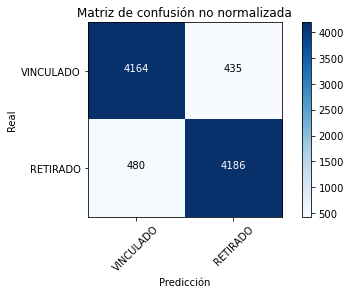

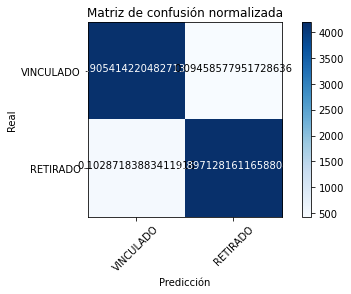

[[4164  435]
 [ 480 4186]]
Exactitud:  0.901241230437129
Kappa    :  0.8024860066369092
-------------------------------------
Metricas para la categoría  VINCULADO
Precisión     :  0.896640826873385
Recall        :  0.9054142204827136
Especificidad :  0.9058645314866912
F1-score      :  0.9010061668289516
-------------------------------------
Metricas para la categoría  RETIRADO
Precisión     :  0.9058645314866912
Recall        :  0.8971281611658808
Especificidad :  0.98
F1-score      :  0.9014751803596426


In [137]:
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
cm= metrics.confusion_matrix(y_test, y_pred)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Estado_Names))
    plt.xticks(tick_marks, Estado_Names, rotation=45)
    plt.yticks(tick_marks, Estado_Names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión no normalizada')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Estado_Names,
                      title='Matriz de confusión no normalizada')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Estado_Names, normalize=True,
                      title='Matriz de confusión normalizada')

plt.show()
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("-------------------------------------")
print("Metricas para la categoría ", Estado_Names[0])
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", Estado_Names[1])
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))
VN = 98
FP = 2
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))